# Heart Stroke Prediciton
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

In [ ]:
df = pd.read_csv(r"healthcaredatasetstrokedata.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.stroke.value_counts()

,count
stroke,
0,4861
1,249


**Shape of the dataset**

In [ ]:
df.shape

(5110, 12)

**Summary of the dataset**

In [ ]:
# Display summary statistics for a dataframe
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Statistical Inferences
- Median age of population is 43 years.
- 25% of the population is aged below 25
- Another 25% is aged above 60 and remaining in between these ages.
- Average glucose levels of the population is 106
- About 9.7% and 5.4% of population suffers from hypertension and heart disease respectively.
- People with higher BMI (BMI > 45) are less represented. This can affect our machine learning models significantly.

**Check Datatypes in the dataset**

In [ ]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 3. EXPLORING DATA

In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

We have 5 categorical features : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


### Feature Information
- Here we used the heart stroke dataset that is available in the kaggle website for our analysis. This dataset consists of total 12 attributes. The complete description of the attributes used in the proposed work is given below:
- **id** : This attribute means person’s id. It’s numerical data.
- **Age** : This attribute means a person’s age. It’s numerical data.
- **Gender** : This attribute means a person’s gender. It’s categorical data.
- **Hypertension** : This attribute means that this person is hypertensive or not. It’s numerical data.
- **work type** : This attribute represents the person work scenario. It’s categorical data.
- **residence type** : This attribute represents the person living scenario. It’s categorical data.
- **heart disease** : This attribute means whether this person has a heart disease person or not. It’s numerical data.
- **avg glucose level** : This attribute means what was the level of a person’s glucose condition. It’s numerical data.
- **Bmi** : This attribute means body mass index of a person. It’s numerical data.
- **ever married** : This attribute represents a person’s married status. It’s categorical data.
- **smoking Status** : This attribute means a person’s smoking condition. It’s categorical data.
- **Stroke** : This attribute means a person previously had a stroke or not.

In [ ]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64
---------------------------
ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64
---------------------------
work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64
---------------------------
Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64
---------------------------
smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64
---------------------------


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features


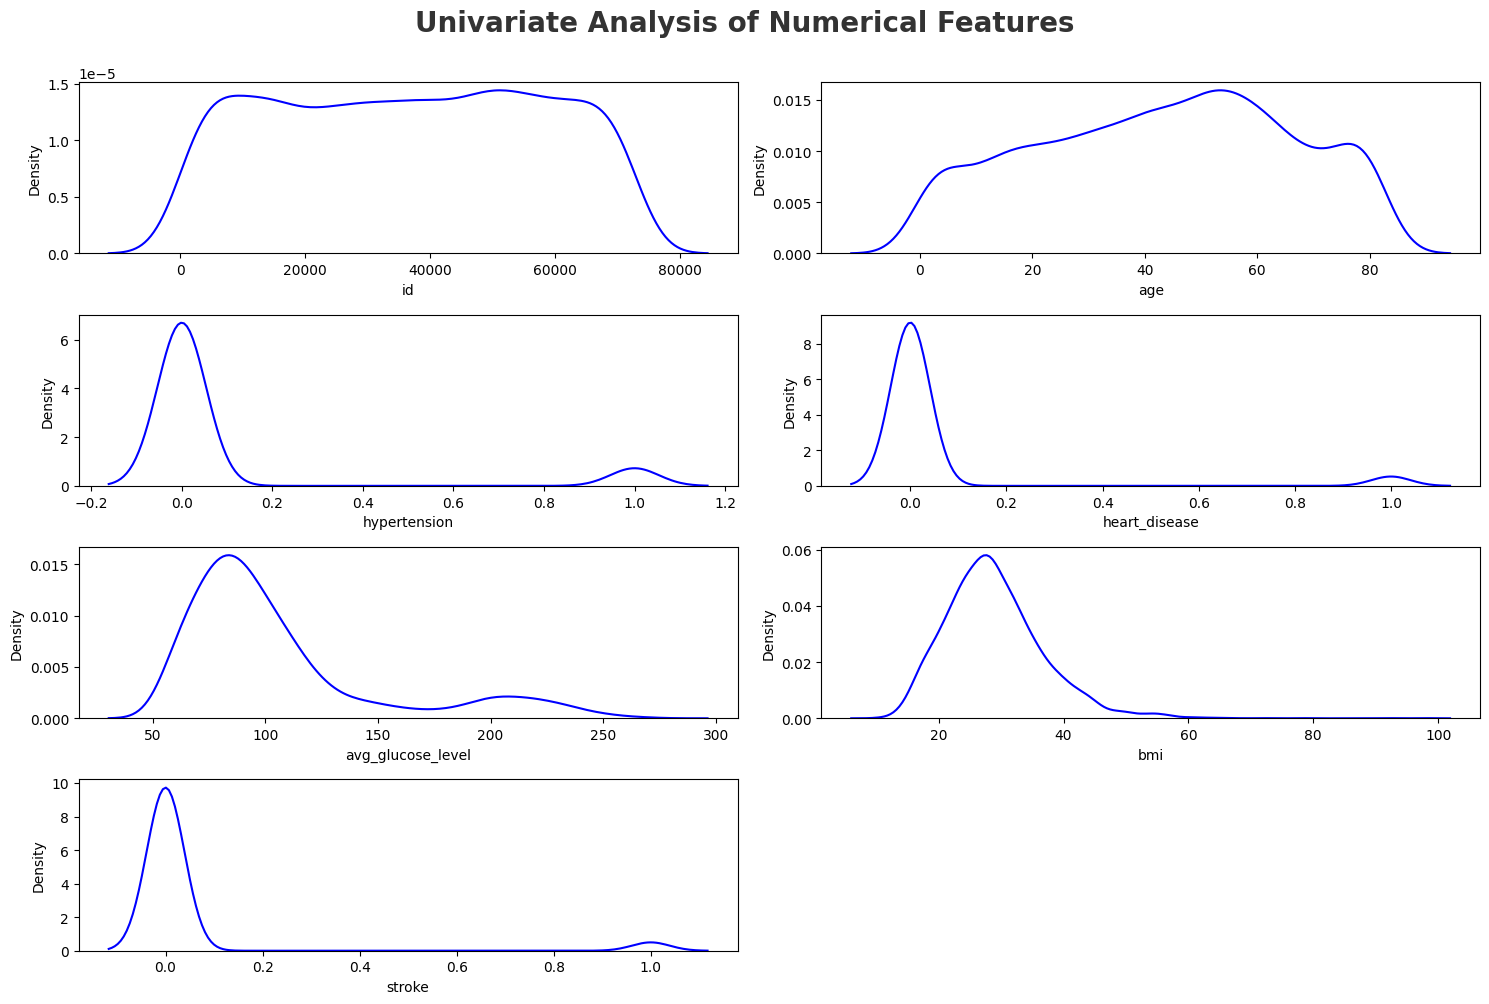

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# save plot
# plt.savefig('./images/Univariate_Num.png')

**Report**
- `age`, `bmi`,`avg_glucose_level` are the only continuous features.
- `id` is a primary key which is of no importance.
- `hypertension`, `heart_disease`, `stroke` are Categorical features but they are encoded.

### Categorical Features

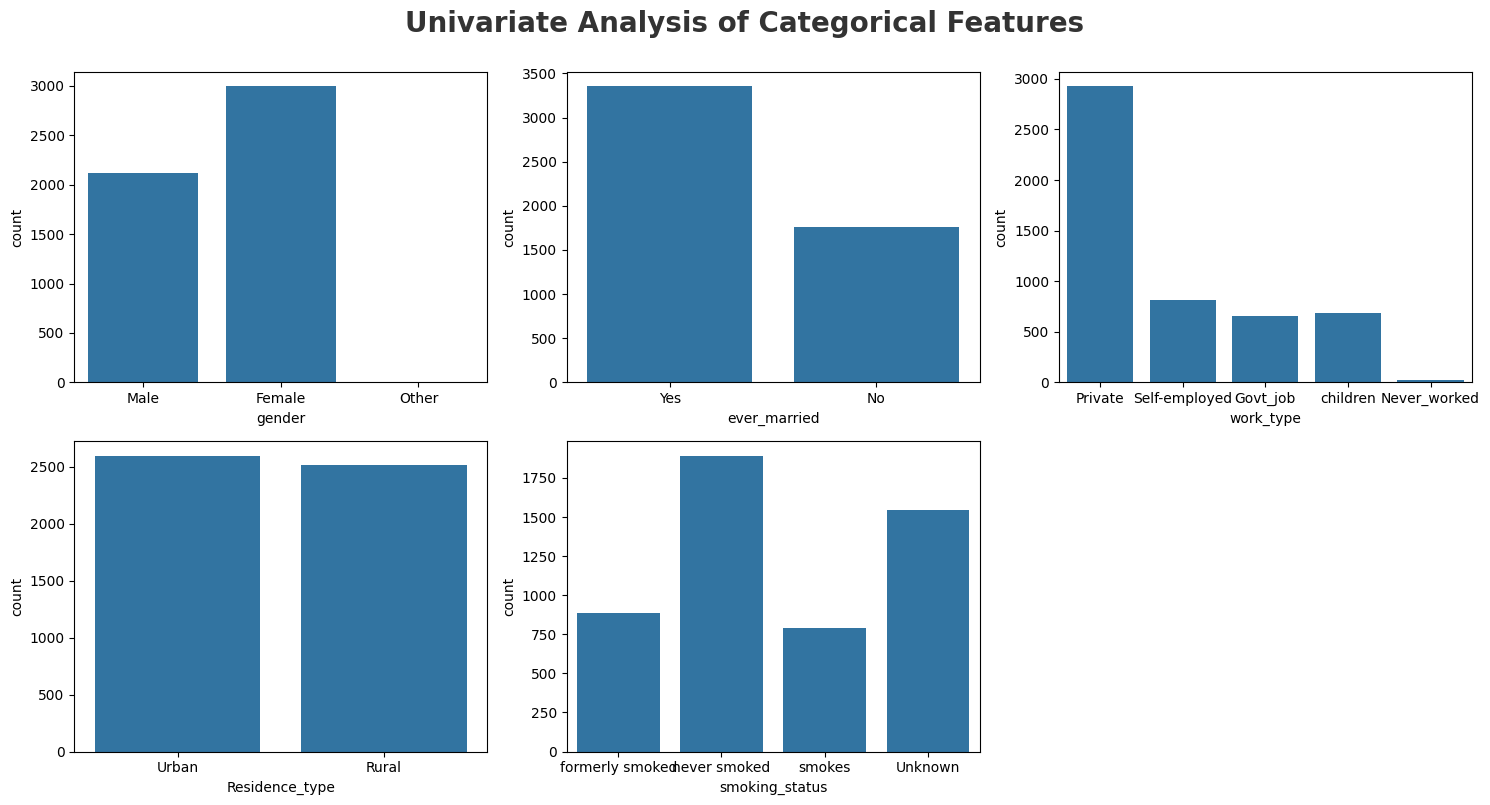

In [ ]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

# save plot
# plt.savefig('./images/Univariate_Cat.png')

- `Gender` has Others category which is around 2% of total Genders.
- `smoking` has Unknown category for whom the smoking status is not available.

## Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

In [ ]:
discrete_features=[feature for feature in numeric_features if (len(df[feature].unique())<=25 and len(df[feature].unique())>5)]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

encoded_categorical = [feature for feature in numeric_features if len(df[feature].unique()) <=5]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))
print('\nWe have {} encoded_categorical : {}'.format(len(encoded_categorical), encoded_categorical))

We have 0 discrete features : []

We have 4 continuous_features : ['id', 'age', 'avg_glucose_level', 'bmi']

We have 3 encoded_categorical : ['hypertension', 'heart_disease', 'stroke']


- There are no discrete numerical features

In [ ]:
categorical_features = categorical_features + encoded_categorical
print(categorical_features)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']


### Check Multicollinearity in Numerical features

In [ ]:
df[(list(df[continuous_features])[1:])].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


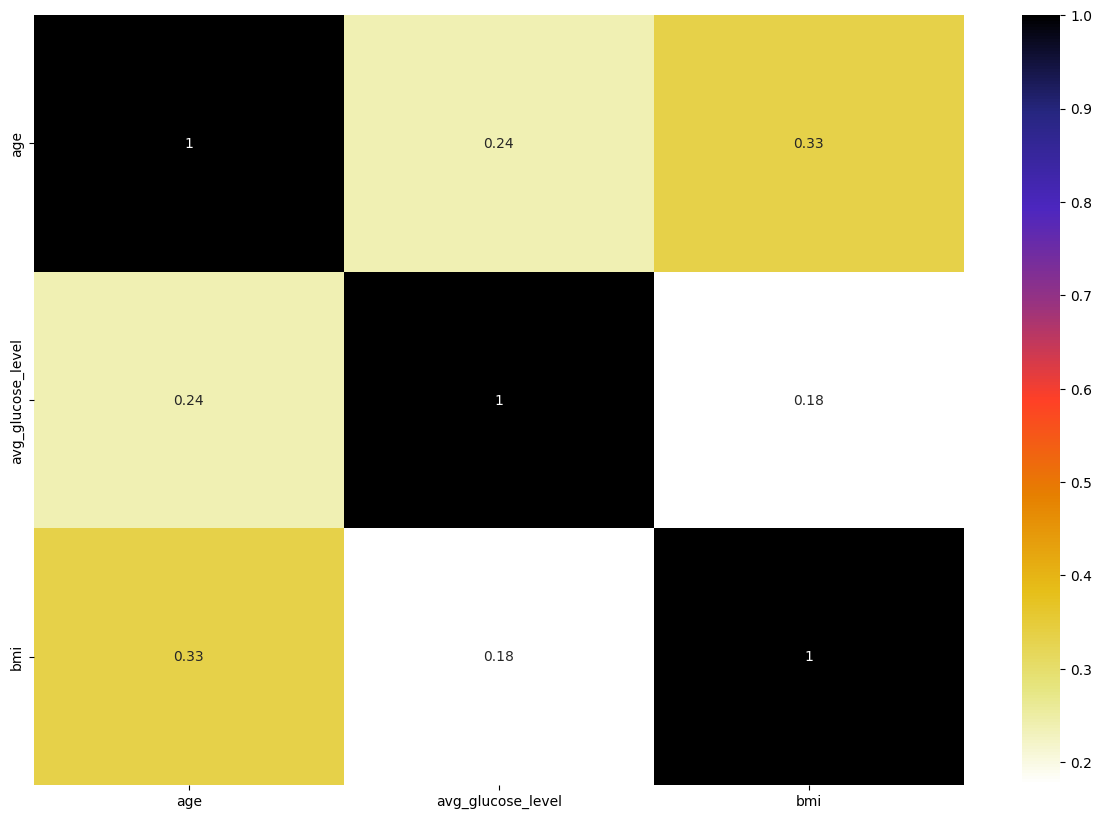

In [ ]:
plt.figure(figsize = (15,10))
cont_features = continuous_features.copy()
cont_features.remove('id')
sns.heatmap(df[cont_features].corr(), cmap="CMRmap_r", annot=True)
plt.show()

**Insight**
* There is no multicollinearity present in the dataset since their is no correlation between the features.

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e stroke**

**Null Hypothesis ($ H_0 $)**: The Feature is independent of target column (No-Correlation)

**Alternative Hypothesis ($ H_1 $)**: The Feature and Target column are not independent (Correlated)

In [ ]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['stroke'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Fail to Reject Null Hypothesis
1,ever_married,Reject Null Hypothesis
2,work_type,Reject Null Hypothesis
3,Residence_type,Fail to Reject Null Hypothesis
4,smoking_status,Reject Null Hypothesis
5,hypertension,Reject Null Hypothesis
6,heart_disease,Reject Null Hypothesis
7,stroke,Reject Null Hypothesis


Let's deal with the gender column which has a category `other` with only one observation and check the hypothesis again

In [ ]:
df1 = df.copy()
df1.gender = np.where(df.gender == 'Other', 'Female', df.gender)

In [ ]:
chi2_contingency(pd.crosstab(df1['stroke'], df1['gender']))

Chi2ContingencyResult(statistic=np.float64(0.34312923759376157), pvalue=np.float64(0.5580285118426893), dof=1, expected_freq=array([[2849.05968689, 2011.94031311],
       [ 145.94031311,  103.05968689]]))

Even after the substitution the difference in not significant and we fail to reject the null hypothesis.

**Report**
- `Gender` and `Residence_type` are independent of the target columnn (Not-Correlated with target)

### Checking Null Values

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


**We have a single column `bmi` with about 200 missing values which we have to deal with**

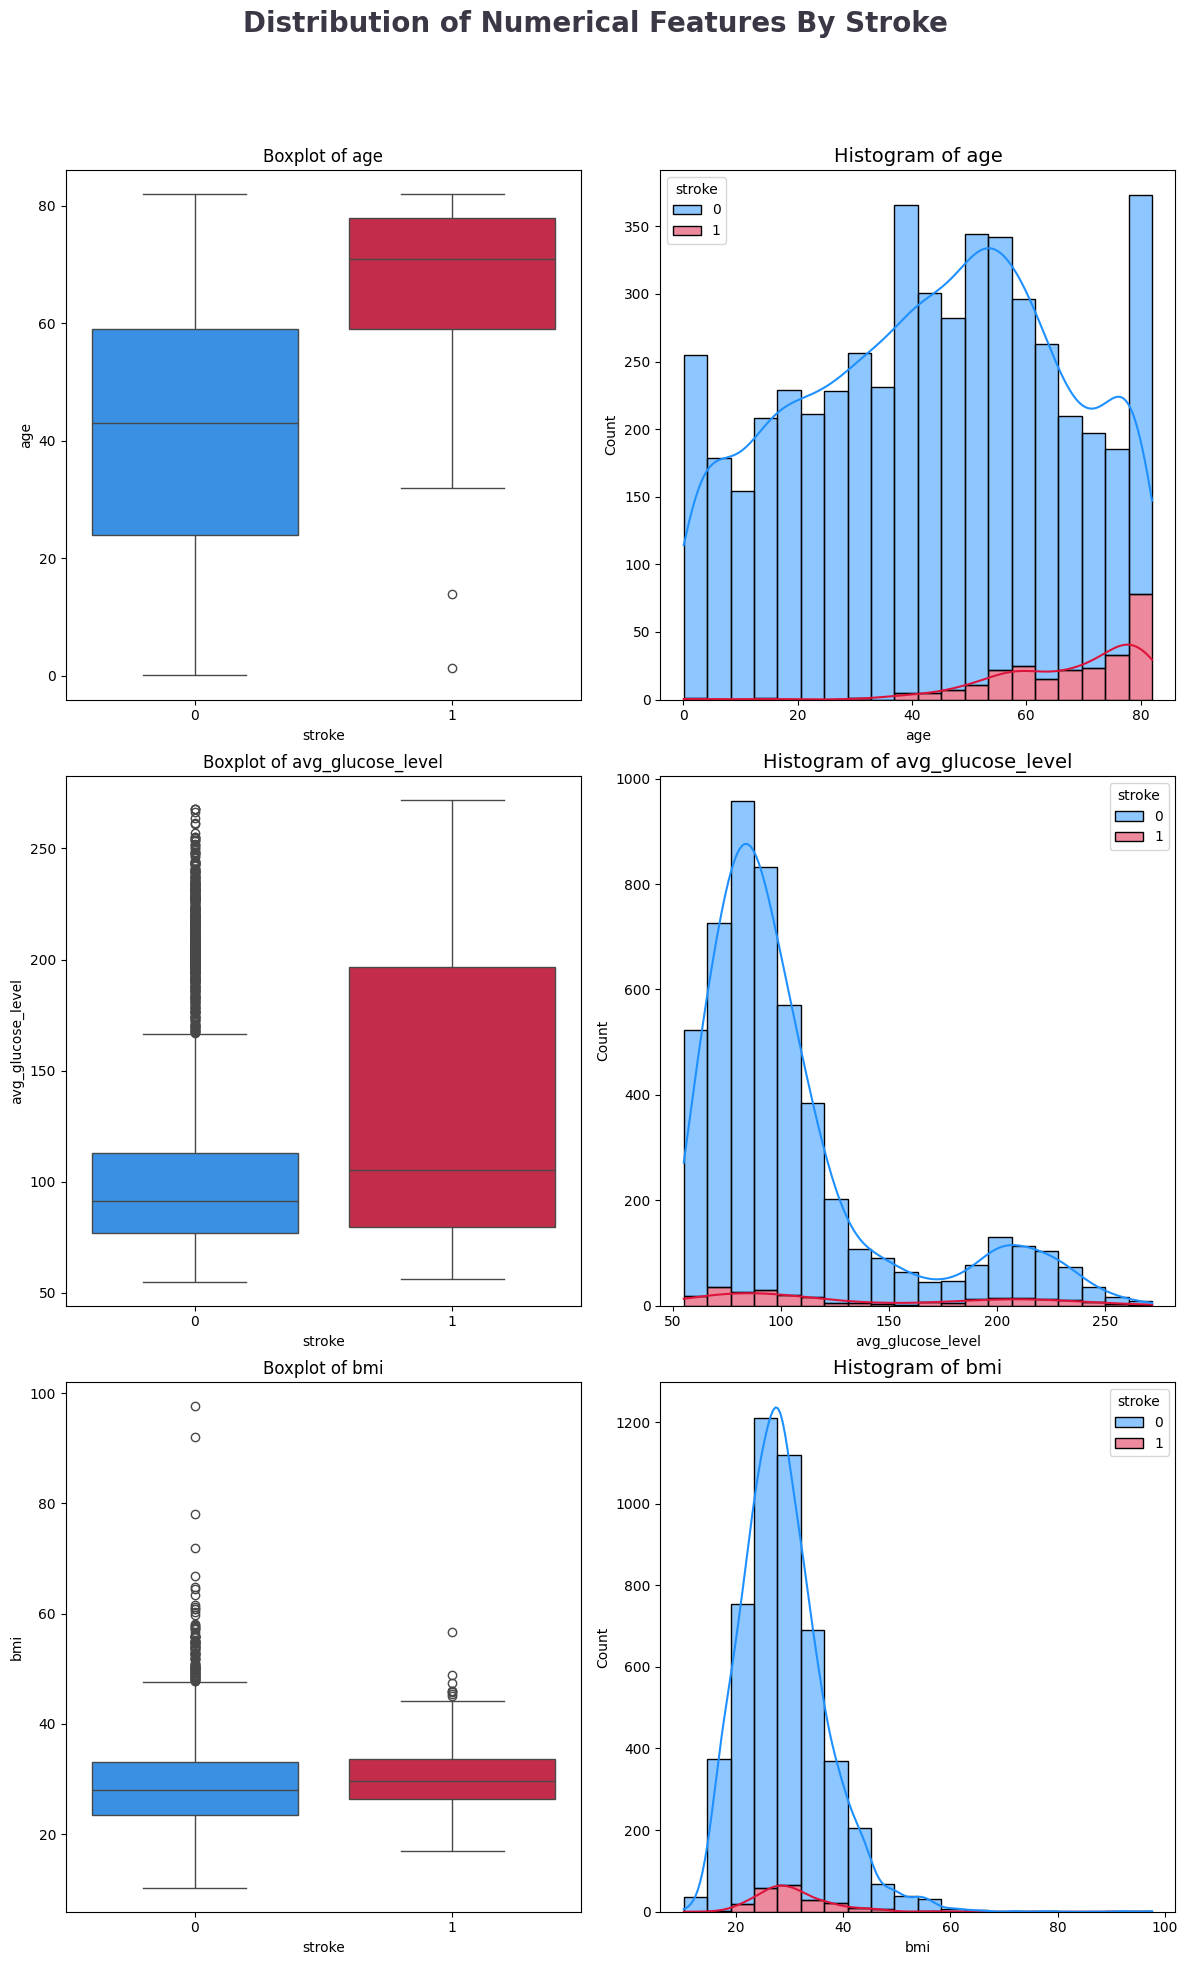

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


continuous_features = ['age', 'avg_glucose_level', 'bmi']

# Colors
clr1 = ['#1E90FF', '#DC143C']

# Create subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(12, 20))

fig.suptitle(
    'Distribution of Numerical Features By Stroke',
    color='#3C3744',
    fontsize=20,
    fontweight='bold',
    ha='center'
)

# Loop through features
for i, col in enumerate(continuous_features):

    # Boxplot
    sns.boxplot(
        data=df,
        x='stroke',
        y=col,
        palette=clr1,
        ax=ax[i, 0]
    )
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)

    # Histogram
    sns.histplot(
        data=df,
        x=col,
        hue='stroke',
        bins=20,
        kde=True,
        multiple='stack',
        palette=clr1,
        ax=ax[i, 1]
    )
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=14)

# Adjust layout
fig.tight_layout()
fig.subplots_adjust(top=0.90)

plt.show()


**Report**
* In the `id` column has unique value for each row, it can be ignored as a feature.
* Higher `age` group people have higher chance of heart stroke
* Higher the `avg_glucose_level` higher will be the chance of stroke.
* `bmi` have not much of a influence on the heart stroke may be because of missing values.

## Initial Analysis Report

* **There are missing values in the `bmi`.**
* **The `id` column can be deleted because each row has unique values.**
* **`Resident_type` and `Gender` columns are not correlated with `stroke` (Target Column)**
* **The `stroke` column is the target to predict.**

## 4. Visualization

### 4.1 Visualize the Target Feature

In [ ]:
df1 = df.copy()
df1['stroke'] = np.where((df.stroke == 1),'Stroke', 'Not-Stroke' )

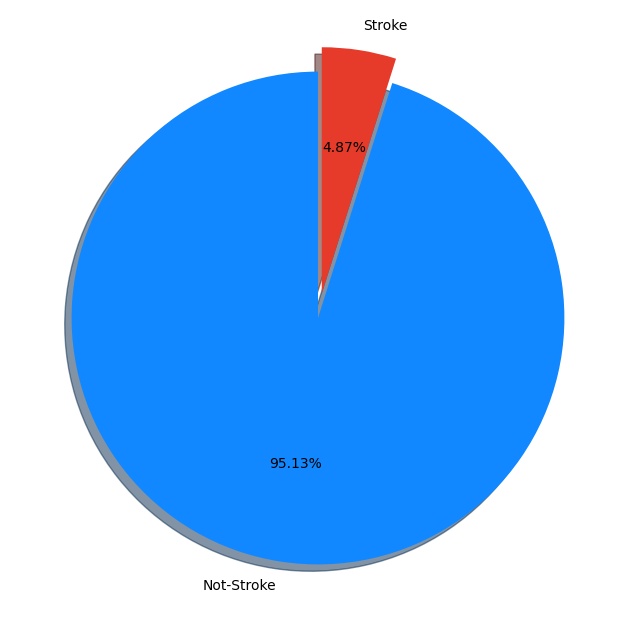

In [ ]:
percentage = df1.stroke.value_counts(normalize=True)*100
label = ["Not-Stroke", "Stroke"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff', '#e63a2a']
ax.pie(percentage, labels = label, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

* From the chart it is clear that the Target Variable is Imbalanced

**What is imbalanced data?**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here number of Not-stroke has more count than the number of stroke of the dataset.

### 4.2 Do Men or Women have more chance of stroke?

In [ ]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df1[df1.stroke == 'Stroke'].gender.value_counts(normalize=True)

,proportion
gender,
Female,0.566265
Male,0.433735


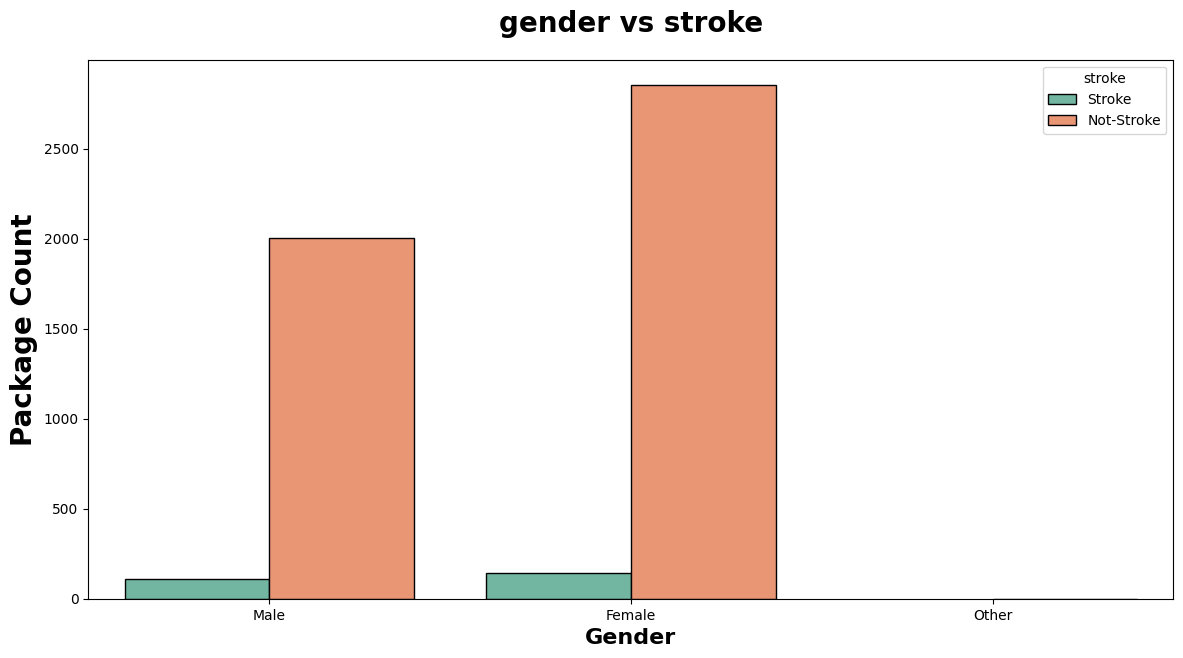

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="gender",hue="stroke", data=df1,ec = "black",palette="Set2")
plt.title("gender vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.show()

**insights**
* As per the chart there is no much difference between the stroke of male and female.
* This Feature has no impact on the Target Variable.

* **Our Insights from Chi2 test is that gender column is not correlated with target column. Which is justified by above chart**

### 4.3 AGE Category Split

In [ ]:
bins= [0,10,20,50,85]
labels = ['Children','Teens','Adult','Senior']
df2 = df.copy()
df2['age_cat'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_group = df2.groupby(['age_cat', 'stroke'])['id'].count().reset_index(name='count')
age_group

,age_cat,stroke,count
0,Children,0,471
1,Children,1,1
2,Teens,0,493
3,Teens,1,1
4,Adult,0,1916
5,Adult,1,18
6,Senior,0,1981
7,Senior,1,229


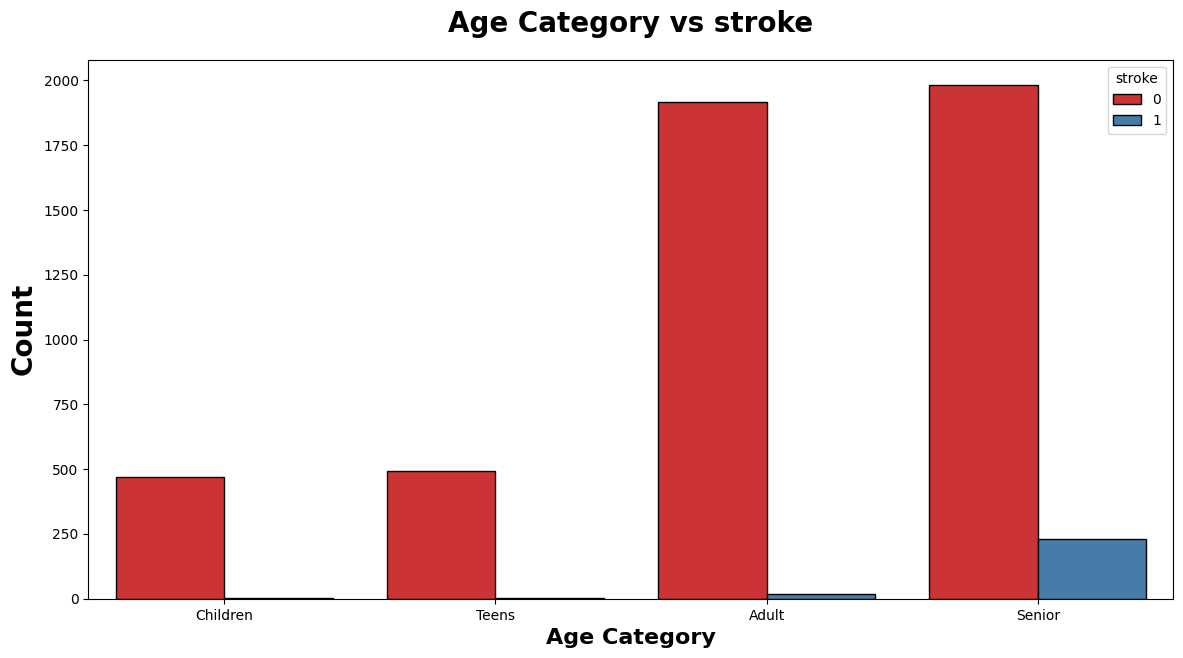

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="age_cat",hue="stroke", data=df2,ec = "black",palette="Set1")
plt.title("Age Category vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Age Category", weight="bold", fontsize=16)
plt.show()

**Report:**
* As per the Chart Senior age Group has the more chance of heart stroke followed by adults.
* Children and teen have least chance of the stroke because of high physical activity.

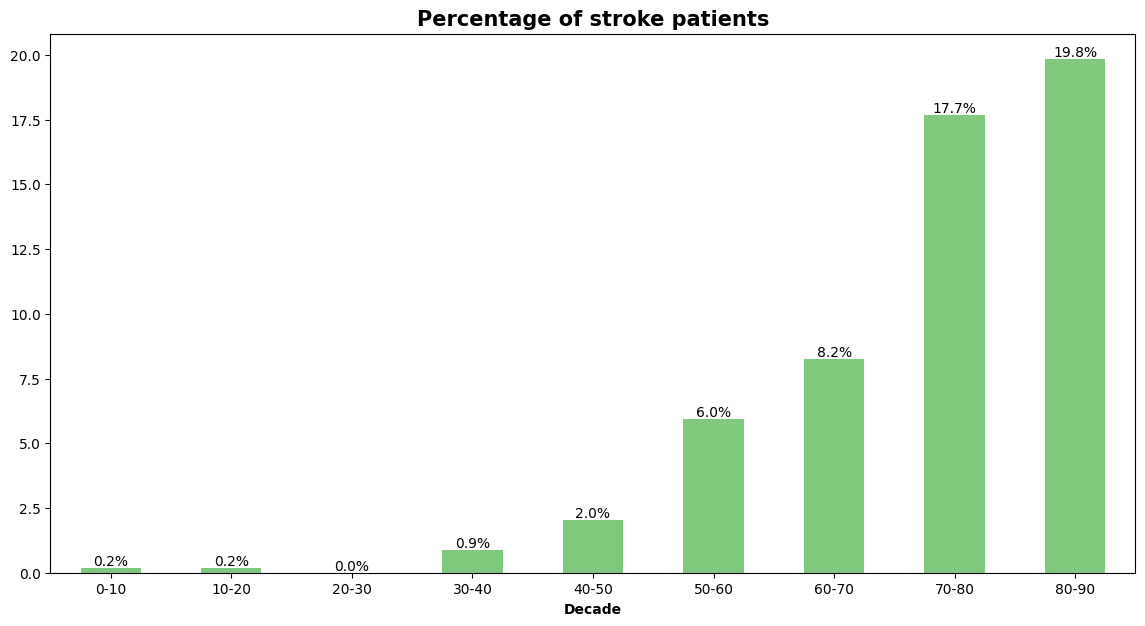

In [ ]:
df2= df.copy()
bins=[0,10,20,30,40,50,60,70,80,90]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
df2['age_group']=pd.cut(df['age'],bins=bins,labels=labels)

import matplotlib.ticker as mtick

plt.figure(figsize=[14,7])

(100*df2[df2["stroke"].isin([1])]['age_group'].value_counts()/df2['age_group'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['age_group'].value_counts()/df2['age_group'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Decade' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
* As the age increases there is higher chance of heart stroke.

### 4.4 Does HyperTension makes any difference

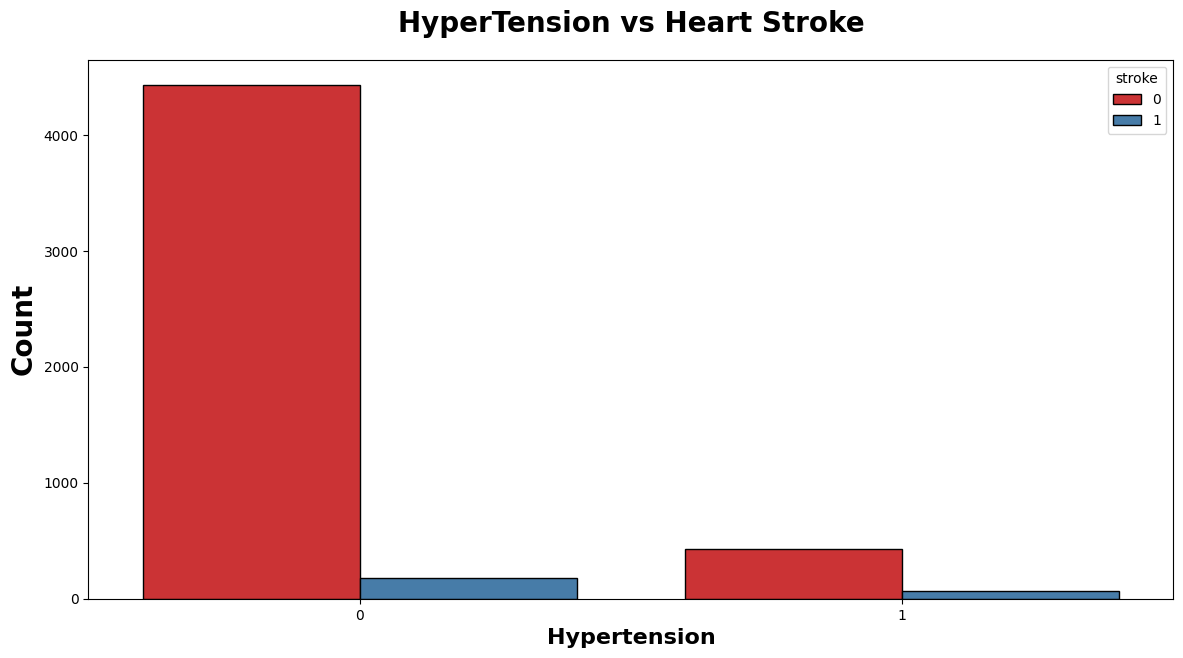

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="hypertension", data=df2,ec = "black",palette="Set1", hue='stroke')
plt.title("HyperTension vs Heart Stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Hypertension", weight="bold", fontsize=16)
plt.show()

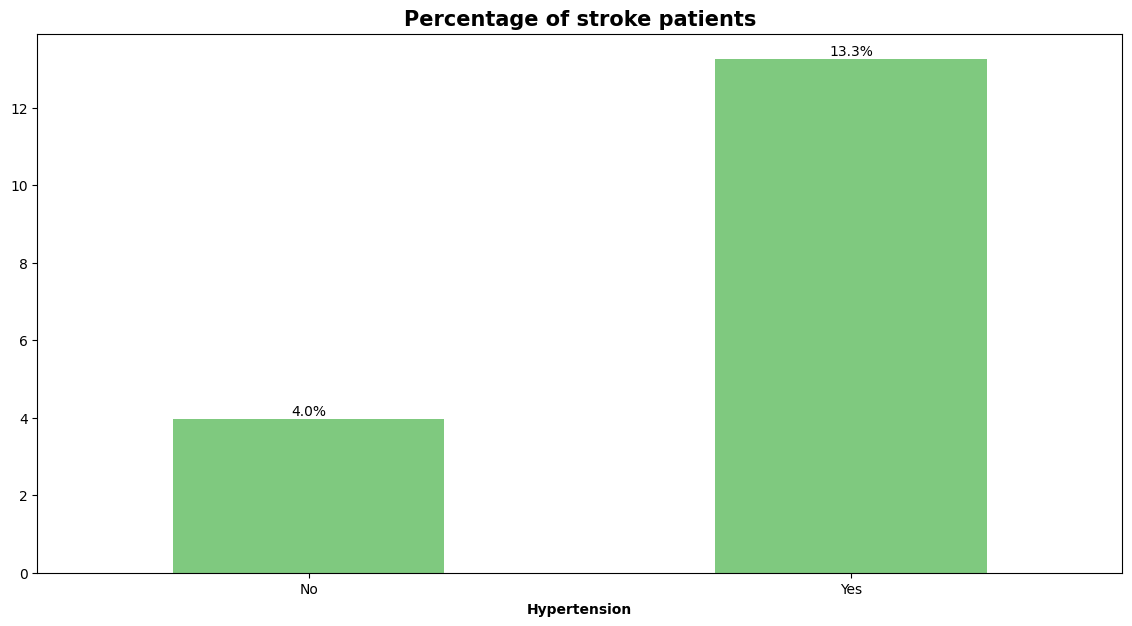

In [ ]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['hypertension'].value_counts()/df2['hypertension'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['hypertension'].value_counts()/df2['hypertension'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Hypertension' , fontweight ='bold')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'] ,rotation=0)
plt.show()

**Insights**

* Evne though the patients with no hypertension and having chance of stroke are high but remember the data is imbalanced
* In comparision with the number of plople in both categories patients with hypertension have more chance of stroke.

## 4.5 Impact of BMI

#### BMI parameter can be divided into four categories [ Under_weight / Normal_weight / Over_weight / Obese ]

The Categories of BMI :

- Under_weight ( BMI < 18.5 )
- Normal_weight ( 18.5 < BMI < 25 )
- Over_weight ( 25 < BMI < 30 )
- Obese ( BMI > 30 )

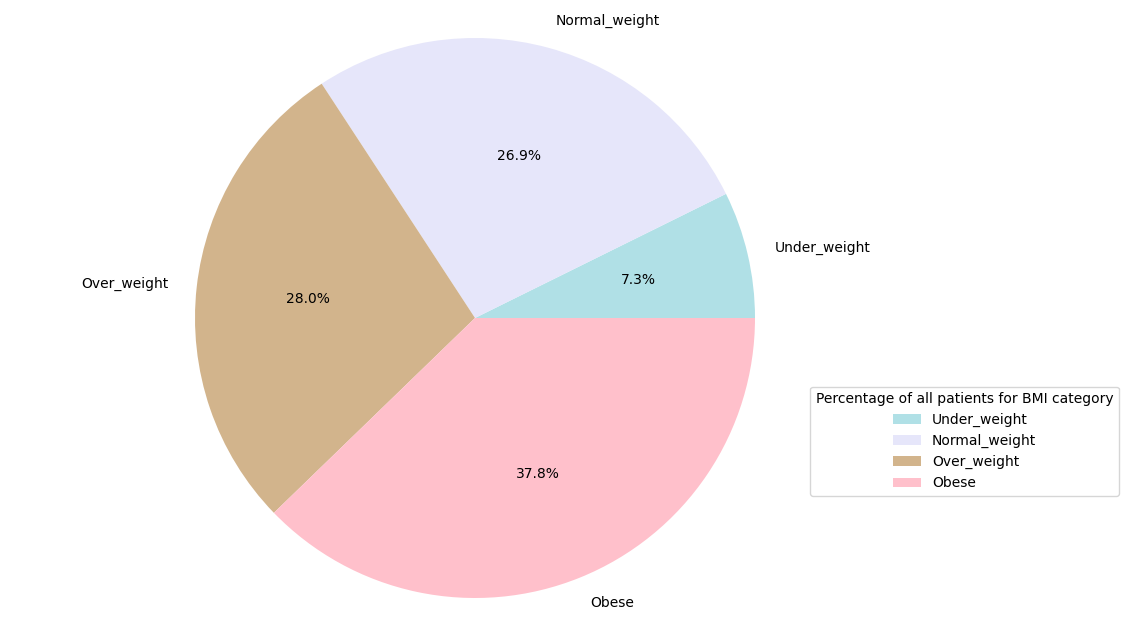

In [ ]:
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(x=[df[df['bmi'] <= 18.5]['stroke'].value_counts()[0] ,
df[(df['bmi'] <= 25) & (df['bmi'] > 18)]['stroke'].value_counts()[0] ,
df[(df['bmi'] <= 30) & (df['bmi'] > 25)]['stroke'].value_counts()[0] ,
df[df['bmi'] > 30]['stroke'].value_counts()[0] ],
labels=['Under_weight','Normal_weight','Over_weight','Obese'] ,
pctdistance=0.6 , radius=6  , autopct='%1.1f%%' ,
colors=['powderblue','lavender','tan','pink'] )

ax1.axis('equal')
plt.legend(title = "Percentage of all patients for BMI category" , loc=1 , bbox_to_anchor=(1.2, 0.4))
plt.show()

**Insights:**
* We have most number of obese patients followed by the Over_weight totally comprises of nearly 65% of the total patients.
* We have leat number of patients with underweight

In [ ]:
df2= df.copy()
bins=[0,18,25,30,100]
labels=['0-18','18-25','25-30','30-100']
df2['bmi_cat']=pd.cut(df['bmi'],bins=bins,labels=labels)
bmi_group = df2.groupby(['bmi_cat', 'stroke'])['id'].count().reset_index(name='count')
bmi_group

,bmi_cat,stroke,count
0,0-18,0,288
1,0-18,1,1
2,18-25,0,1281
3,18-25,1,37
4,25-30,0,1334
5,25-30,1,75
6,30-100,0,1797
7,30-100,1,96


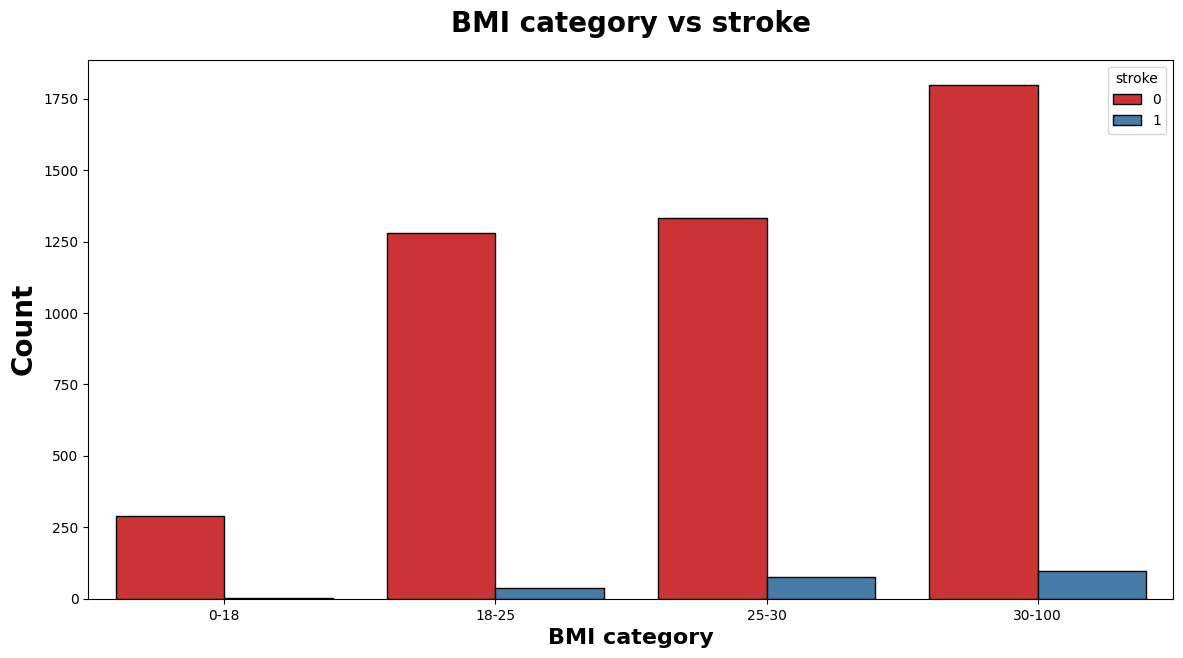

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="bmi_cat",hue="stroke", data=df2,ec = "black",palette="Set1")
plt.title("BMI category vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("BMI category", weight="bold", fontsize=16)
plt.show()

plt.subplots(figsize=(14,7))
sns.countplot(x="bmi_cat",hue="stroke", data=df2,ec = "black",palette="Set1")
plt.title("BMI category vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("BMI category", weight="bold", fontsize=16)
plt.show()

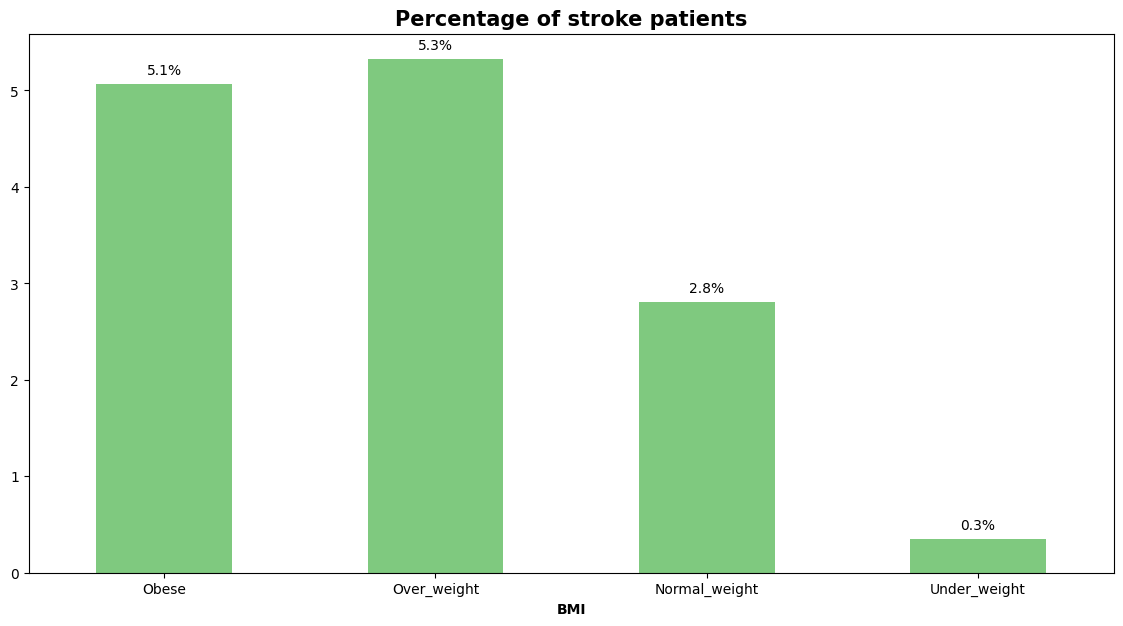

In [ ]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['bmi_cat'].value_counts()/df2['bmi_cat'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['bmi_cat'].value_counts()/df2['bmi_cat'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('BMI' , fontweight ='bold')
plt.xticks(ticks=[0,1,2,3], labels=['Under_weight','Normal_weight','Over_weight','Obese'][::-1] ,rotation=0)
plt.show()

* Obese and overweight people have more chance of heart stroke.

### 4.6 Heark disease vs Stroke

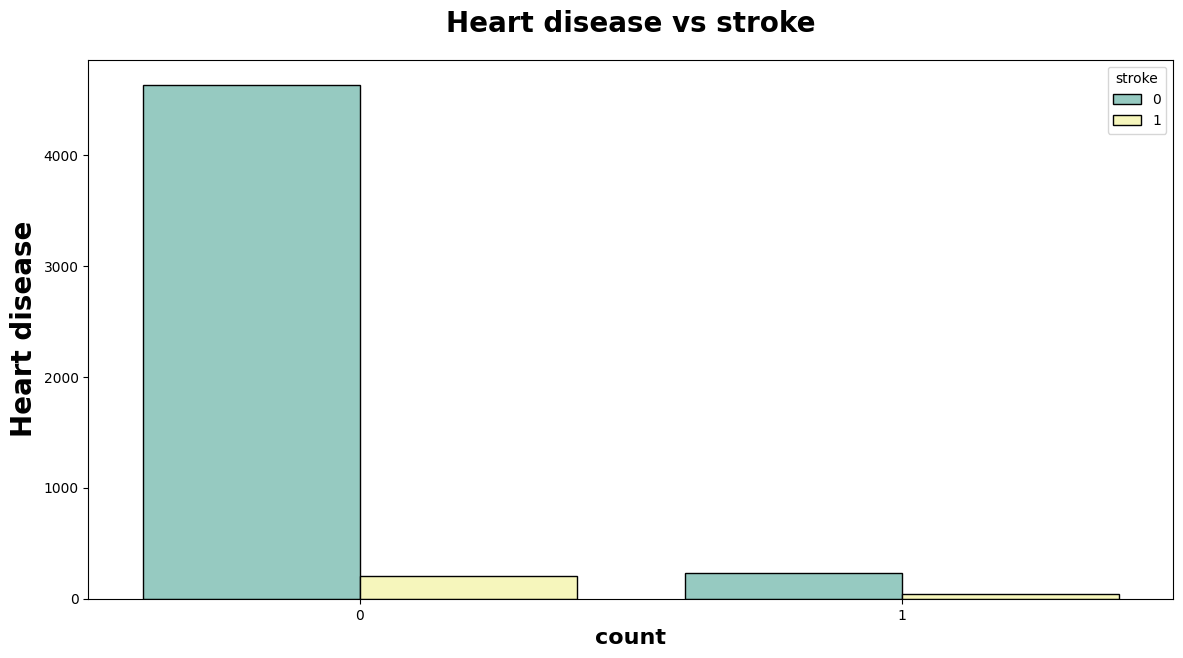

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="heart_disease",hue='stroke', data=df,ec = "black",palette="Set3")
plt.title("Heart disease vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Heart disease", weight="bold", fontsize=20)
plt.xlabel("count", weight="bold", fontsize=16)
plt.show()

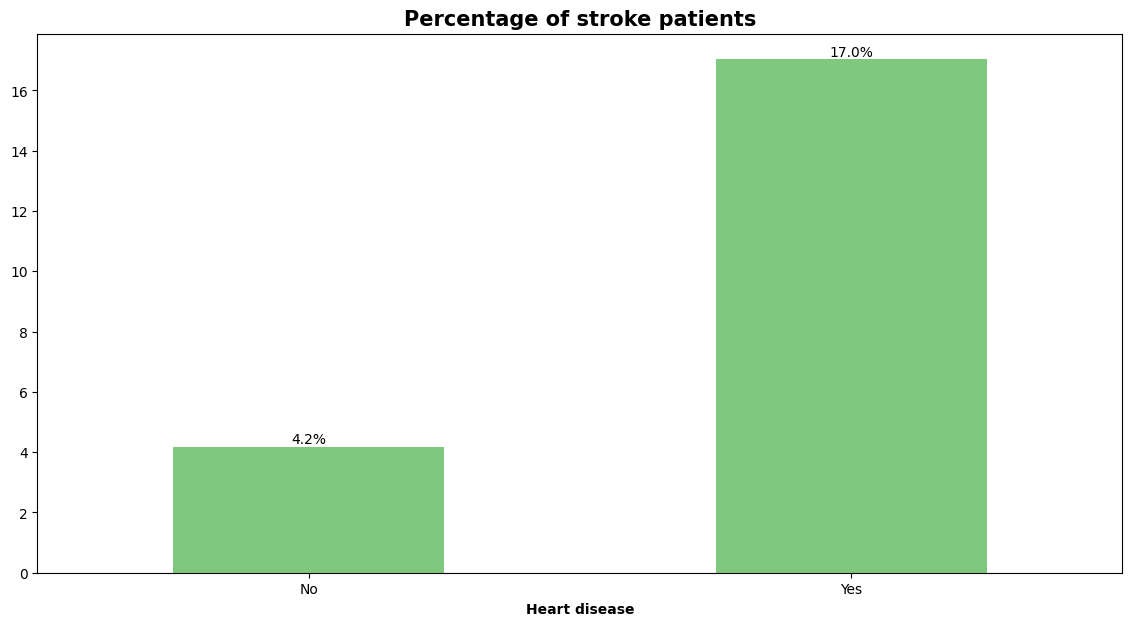

In [ ]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['heart_disease'].value_counts()/df2['heart_disease'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['heart_disease'].value_counts()/df2['heart_disease'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Heart disease' , fontweight ='bold')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'] ,rotation=0)
plt.show()

**Insights**

* Patients with heart disease have high chance of heart attack the the healty people.

## 4.7 Does marriage have any effect on the stroke

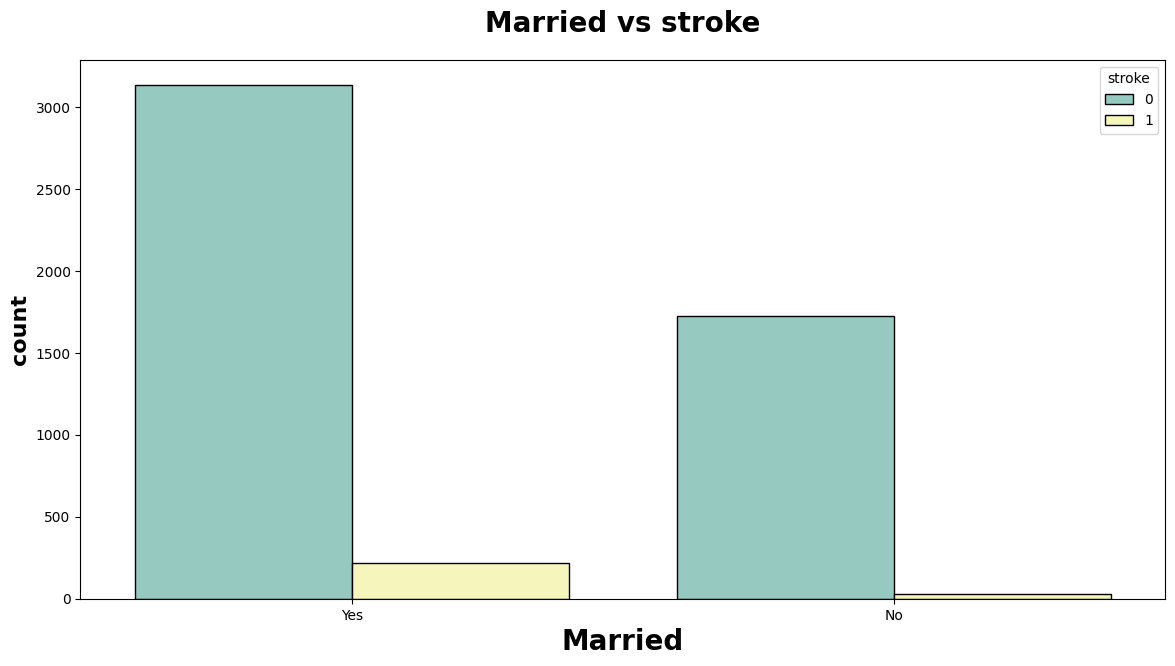

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="ever_married",hue='stroke', data=df,ec = "black",palette="Set3")
plt.title("Married vs stroke", weight="bold",fontsize=20, pad=20)
plt.xlabel("Married", weight="bold", fontsize=20)
plt.ylabel("count", weight="bold", fontsize=16)
plt.show()

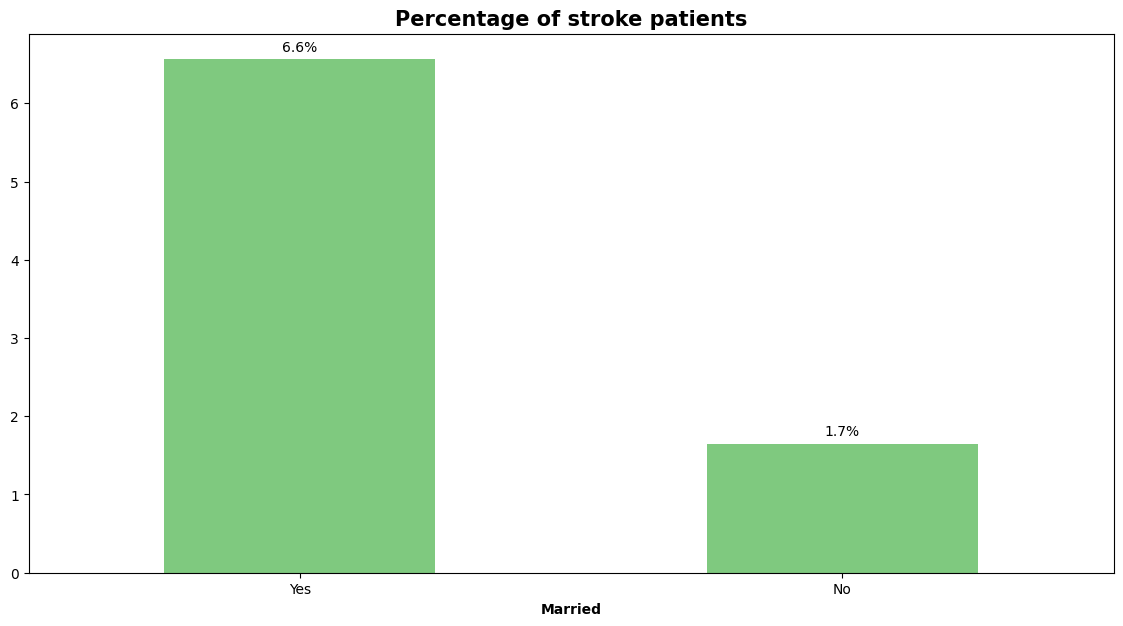

In [ ]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['ever_married'].value_counts()/df2['ever_married'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['ever_married'].value_counts()/df2['ever_married'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Married' , fontweight ='bold')
plt.xticks(ticks=[0,1], labels=['Yes', 'No'] ,rotation=0)
plt.show()

**Insights**

* Surprisingly married people have more chance of stroke which doesnt make any sense.
* It may because the married peple are aged than the unmarried and age is factor playing major role.

## 4.8 Work type vs Stroke

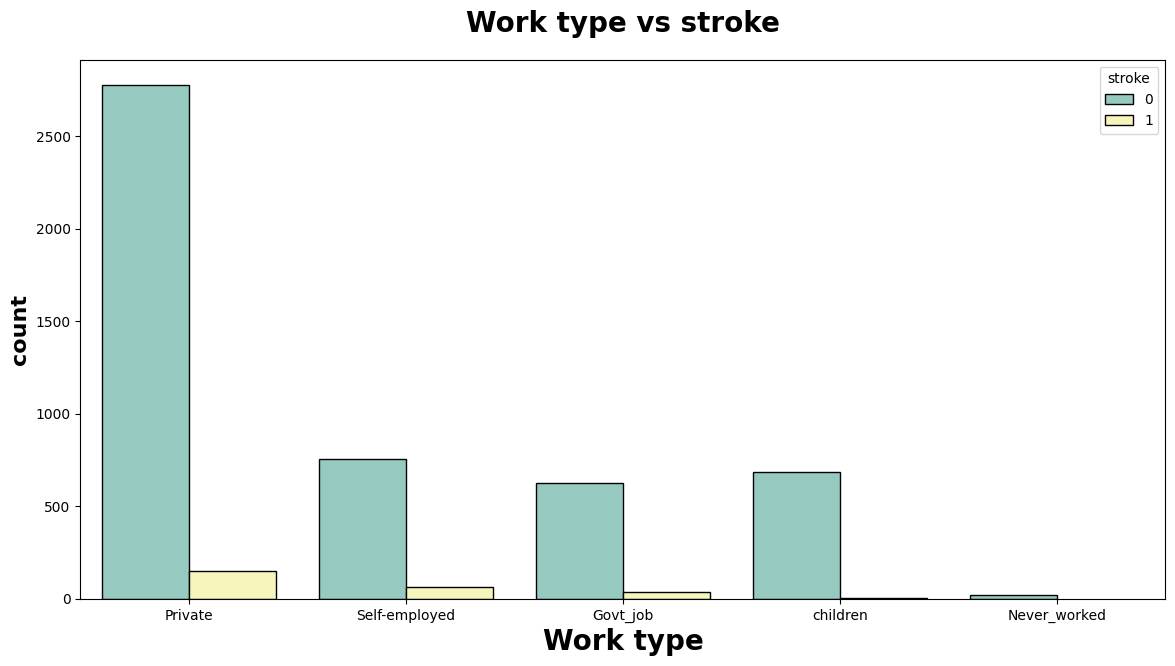

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="work_type",hue='stroke', data=df,ec = "black",palette="Set3")
plt.title("Work type vs stroke", weight="bold",fontsize=20, pad=20)
plt.xlabel("Work type", weight="bold", fontsize=20)
plt.ylabel("count", weight="bold", fontsize=16)
plt.show()

* `children` would have not worked so can be added to `Never_worked` column.
* Hence we can change the `children` to `Never_worked`

In [ ]:
df2 = df.copy()
df2['work_type'] = np.where(df2['work_type'] == 'children', 'Never_worked', df2['work_type'])

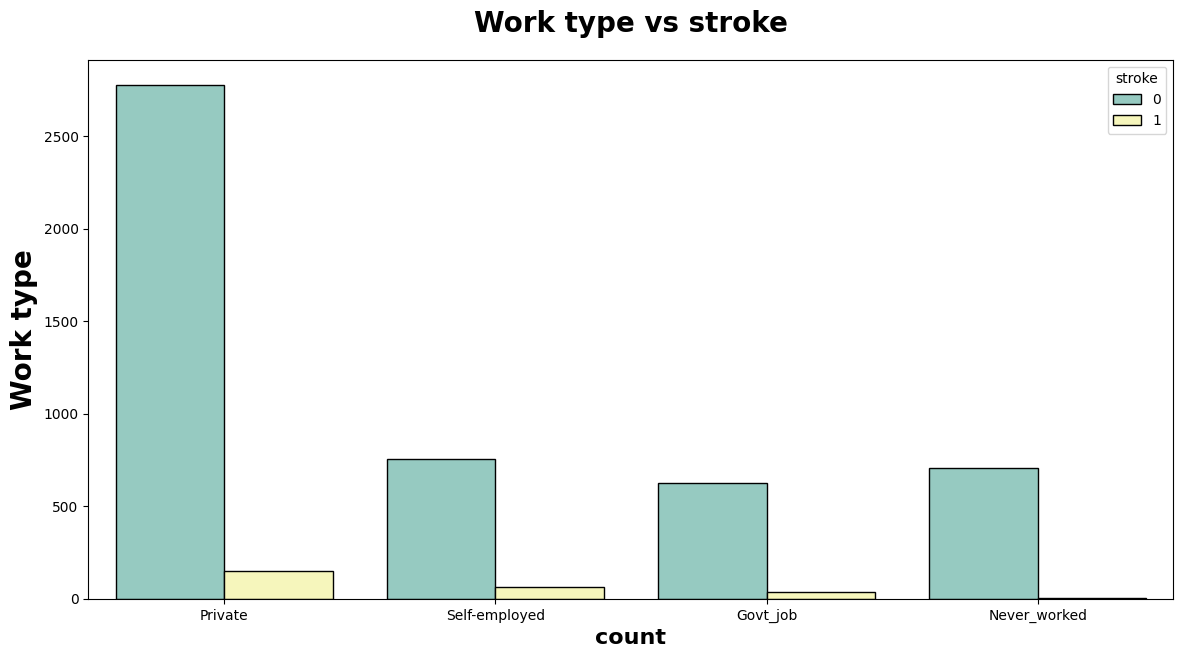

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="work_type",hue='stroke', data=df2,ec = "black",palette="Set3")
plt.title("Work type vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Work type", weight="bold", fontsize=20)
plt.xlabel("count", weight="bold", fontsize=16)
plt.show()

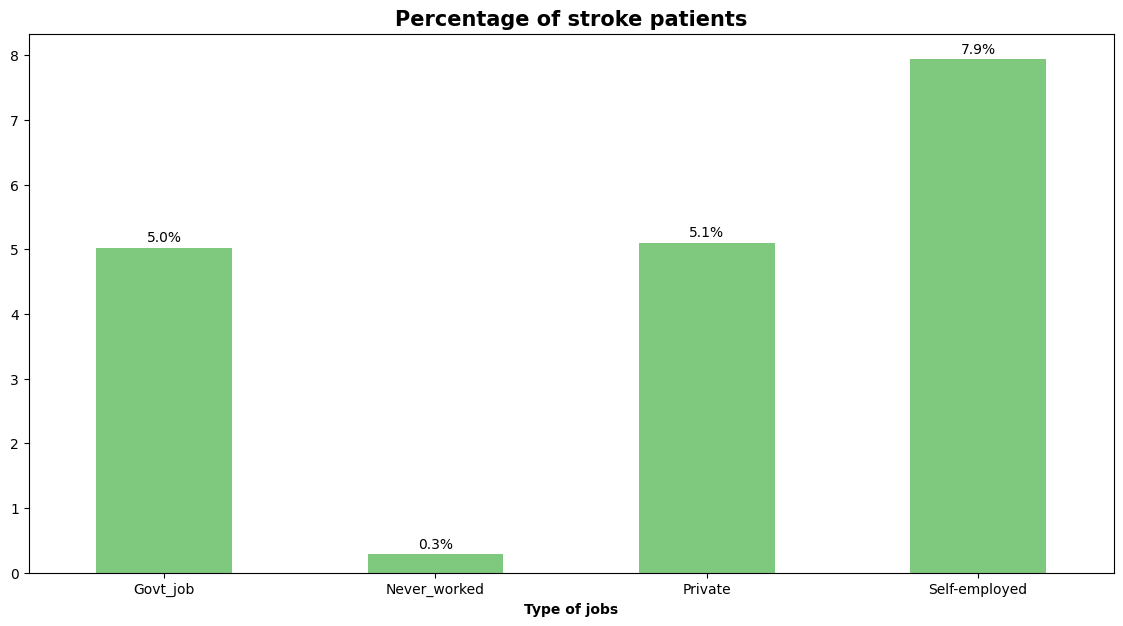

In [ ]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['work_type'].value_counts()/df2['work_type'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent' )
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['work_type'].value_counts()/df2['work_type'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Type of jobs' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insights**

* Self-employed patients have high chance of heart stroke.
* Government and provate job employes have nearly same chance of heart stroke.
* Unemployed and children have least or near zero chance of stroke.

## 4.9 Resident type vs stroke

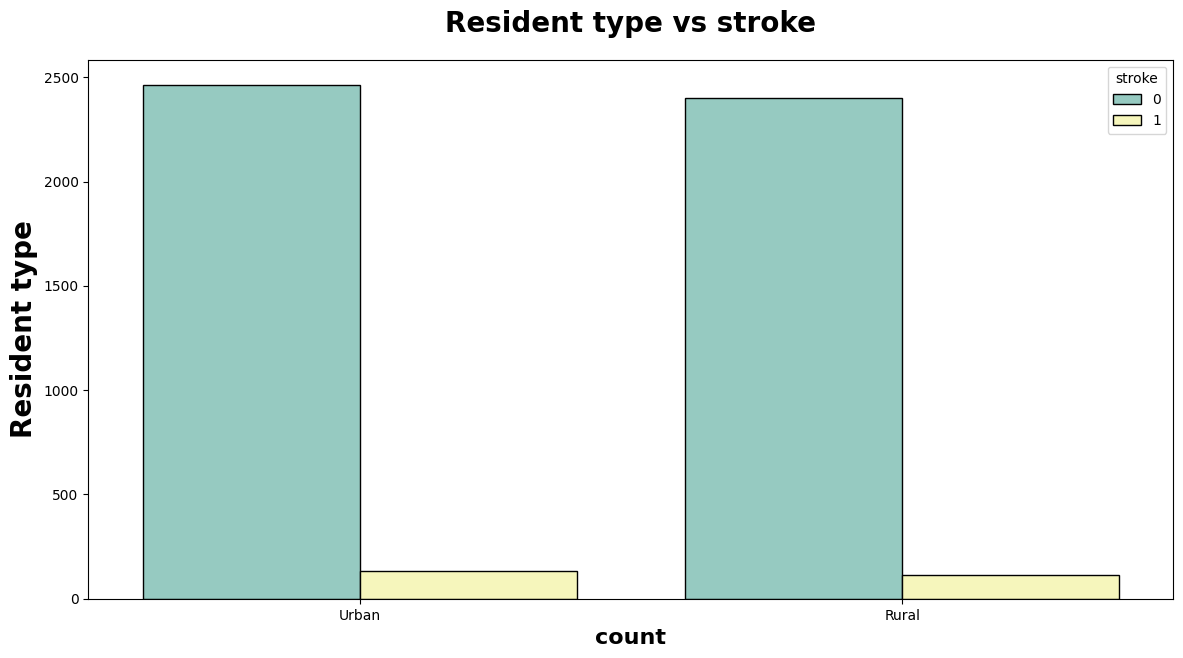

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Residence_type",hue='stroke', data=df2,ec = "black",palette="Set3")
plt.title("Resident type vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Resident type", weight="bold", fontsize=20)
plt.xlabel("count", weight="bold", fontsize=16)
plt.show()

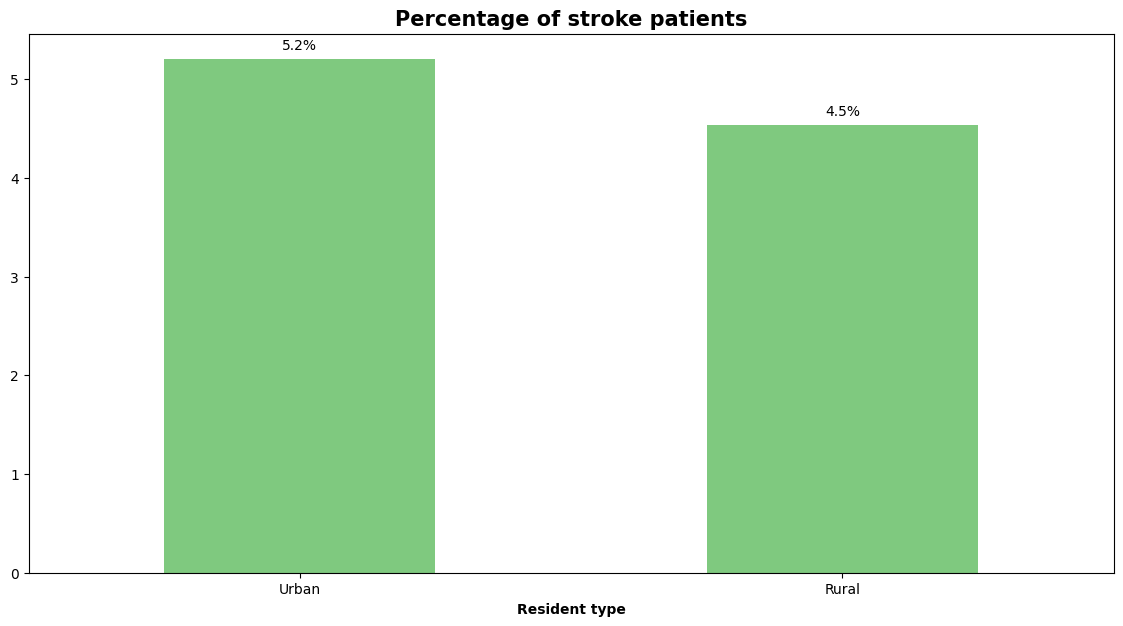

In [ ]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['Residence_type'].value_counts()/df2['Residence_type'].value_counts()).plot(kind='bar',stacked=True , colormap='Accent' )
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['Residence_type'].value_counts()/df2['Residence_type'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Resident type' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insights**

* Urban residents have silght edge over the rural residents here.
* It doesn't have much difference which is already confirmed by the chi2 contingency test

## 4.10 Effect of glucose level

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

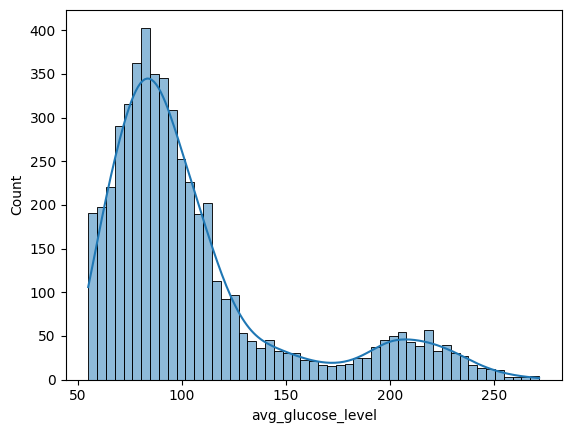

In [ ]:
sns.histplot(df.avg_glucose_level,kde=True)

In [ ]:
df.avg_glucose_level.min(), df.avg_glucose_level.max()

(55.12, 271.74)

In [ ]:
bins= [0,70,140,200, 300]
labels = ['low','Normal','High','Diabetic']
df2 = df.copy()
df2['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)
age_group = df2.groupby(['glucose_cat', 'stroke'])['id'].count().reset_index(name='count')
age_group

,glucose_cat,stroke,count
0,low,0,727
1,low,1,27
2,Normal,0,3406
3,Normal,1,129
4,High,0,350
5,High,1,37
6,Diabetic,0,378
7,Diabetic,1,56


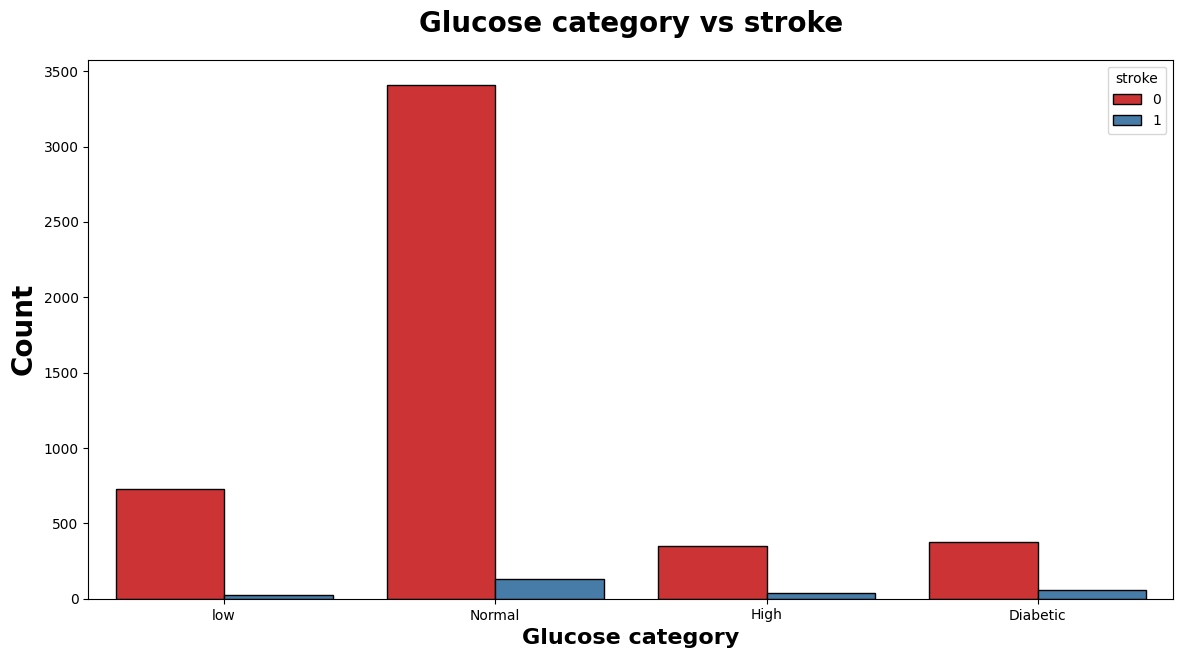

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="glucose_cat",hue="stroke", data=df2,ec = "black",palette="Set1")
plt.title("Glucose category vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Glucose category", weight="bold", fontsize=16)
plt.show()

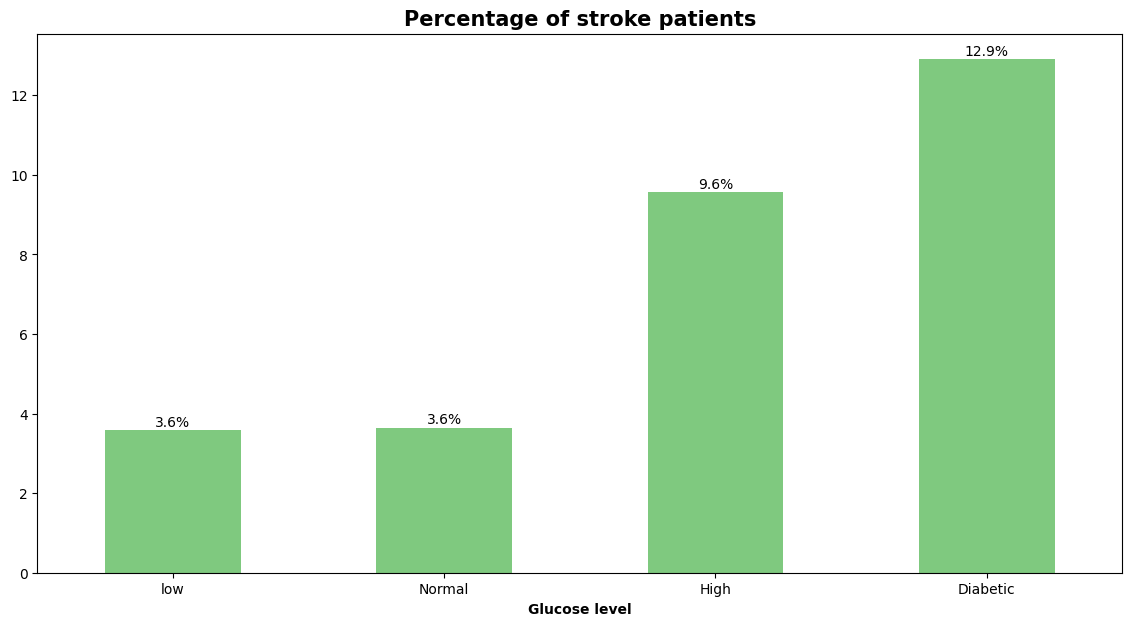

In [ ]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['glucose_cat'].value_counts()/df2['glucose_cat'].value_counts()).plot(kind='bar',stacked=True , colormap='Accent' )
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['glucose_cat'].value_counts()/df2['glucose_cat'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Glucose level' , fontweight ='bold')
plt.xticks(ticks=[0,1,2,3], labels = ['low','Normal','High','Diabetic'] ,rotation=0)
plt.show()

**Insights**

* We can see that the patients with low or normal glucose levels have less chance of stroke.
* High chance of stroke is found in diabetic patients followed by high glucose level.

## 4.11 smoking status vs stroke

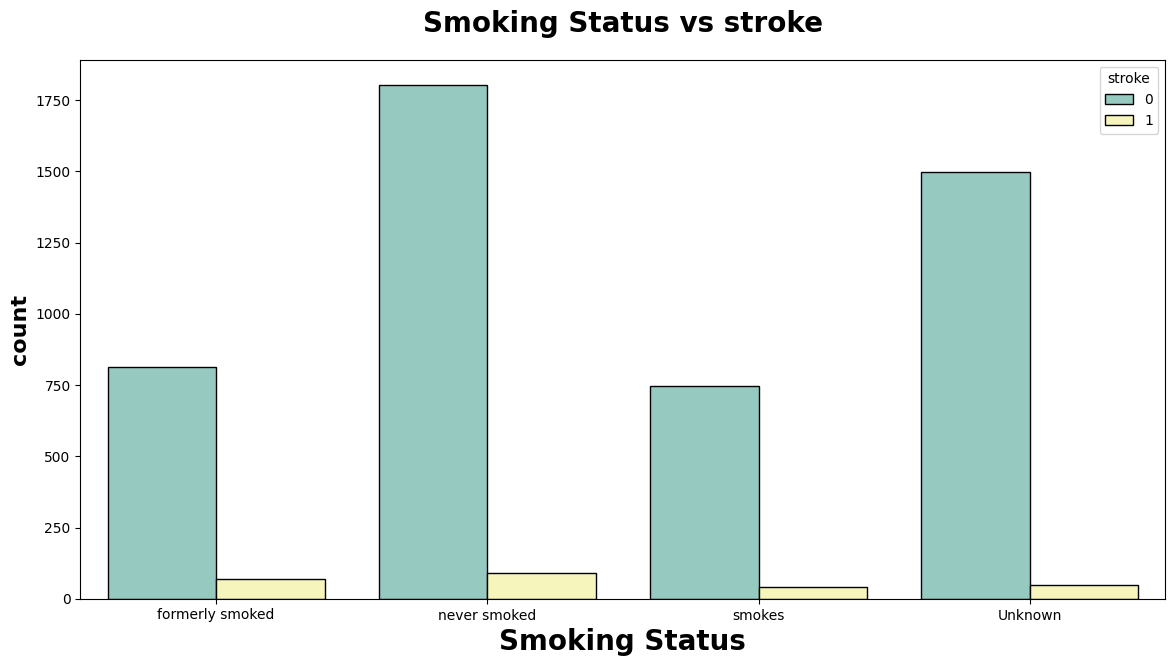

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="smoking_status",hue='stroke', data=df2,ec = "black",palette="Set3")
plt.title("Smoking Status vs stroke", weight="bold",fontsize=20, pad=20)
plt.xlabel("Smoking Status", weight="bold", fontsize=20)
plt.ylabel("count", weight="bold", fontsize=16)
plt.show()

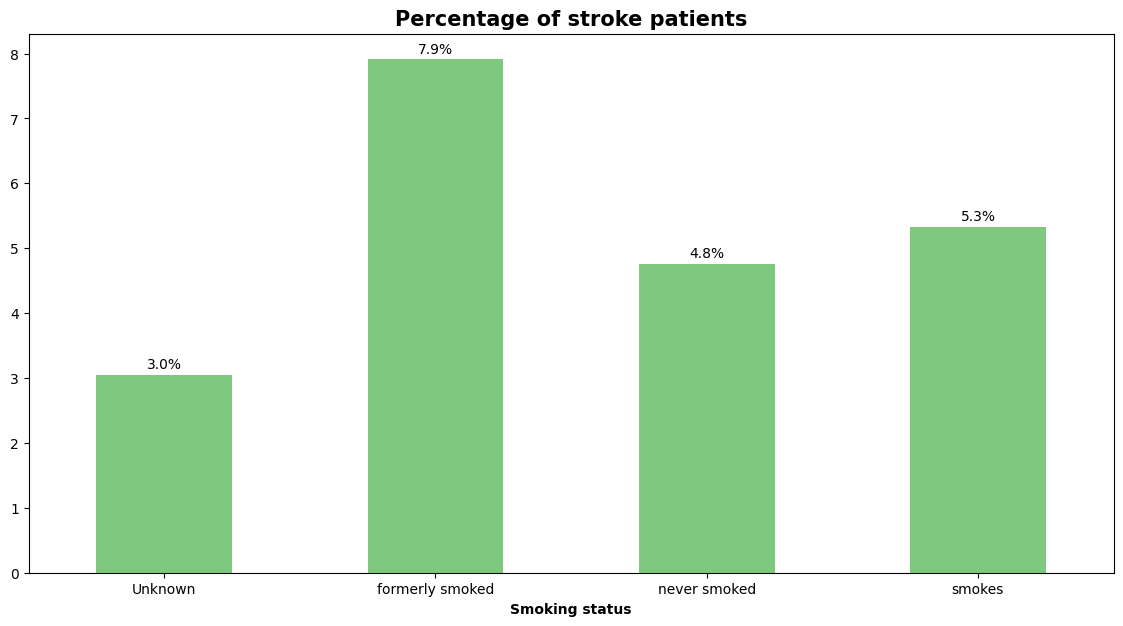

In [ ]:
plt.subplots(figsize=(14,7))
(100*df2[df2["stroke"].isin([1])]['smoking_status'].value_counts()/df2['smoking_status'].value_counts()).plot(kind='bar',stacked=True , colormap='Accent' )
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['smoking_status'].value_counts()/df2['smoking_status'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Smoking status' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insights**

* `formerly_smoked` seems to have high chance of stroke may be because of long term effect of smoking.
* `smokes` and `never smoked` have nearly same chance
* smoking have a long term impact and may not be seen at the beginning stages.

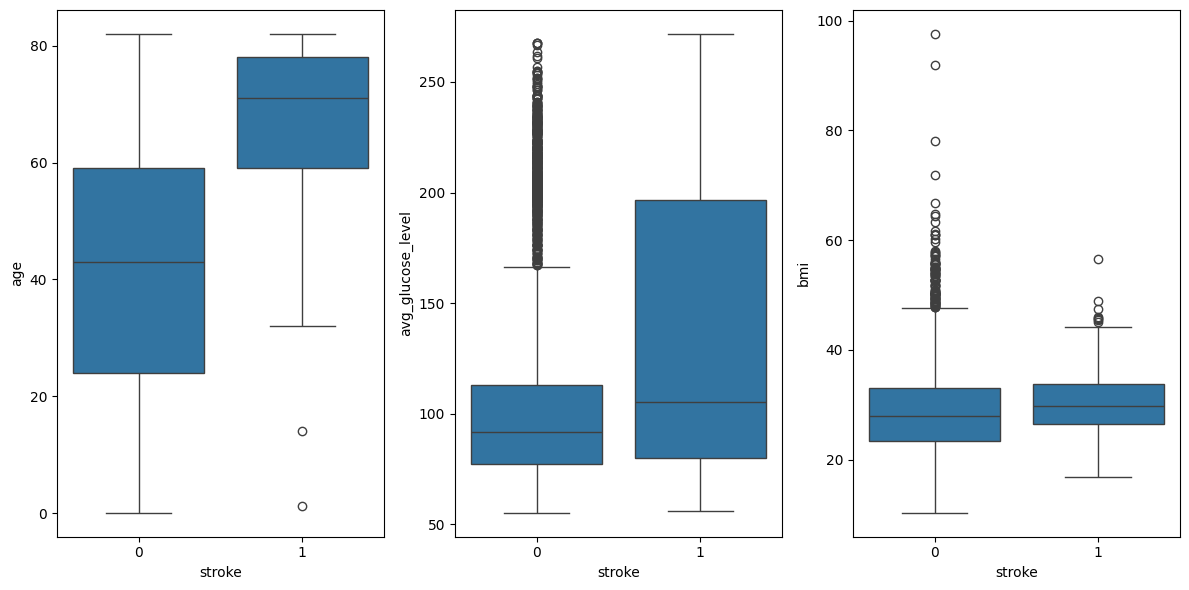

In [ ]:
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(12,6))

for i, col in enumerate(column_list):
  sns.boxplot(data=df, x='stroke', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

## Final Report

* The `stroke` column is the target to predict.
* The target variable here is imbalanced, Handling imbalanced data is required.
* There are outliers in the `avg_glucose_level`, `bmi` columns.
* `Gender` and `Residence_type` has less or no effect on target column.
* Null values in `bmi` column should be handled.
